In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
# Cargando los datos
with open('./X.pkl','rb') as f:
    X = pickle.load(f)

In [4]:
train_split = pd.read_csv('./train_split.csv')

In [5]:
# Preparando las etiquetas
y = pd.get_dummies(train_split['class'])

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [7]:
# Definir la arquitectura de la CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [8]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir el criterio de EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Entrenar el modelo con EarlyStopping
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16, callbacks=[es])


Epoch 1/20
150/150 [==============================] - 109s 726ms/step - loss: 0.5674 - accuracy: 0.8304 - val_loss: 0.5734 - val_accuracy: 0.8300
Epoch 2/20
150/150 [==============================] - 107s 712ms/step - loss: 0.5622 - accuracy: 0.8304 - val_loss: 0.5458 - val_accuracy: 0.8300
Epoch 3/20
150/150 [==============================] - 107s 710ms/step - loss: 0.5560 - accuracy: 0.8304 - val_loss: 0.5711 - val_accuracy: 0.8300
Epoch 4/20
150/150 [==============================] - 107s 713ms/step - loss: 0.5624 - accuracy: 0.8304 - val_loss: 0.5446 - val_accuracy: 0.8300
Epoch 5/20
150/150 [==============================] - 105s 702ms/step - loss: 0.5377 - accuracy: 0.8308 - val_loss: 0.5379 - val_accuracy: 0.8300
Epoch 6/20
150/150 [==============================] - 107s 716ms/step - loss: 0.5160 - accuracy: 0.8304 - val_loss: 0.5448 - val_accuracy: 0.8283
Epoch 7/20
150/150 [==============================] - 106s 706ms/step - loss: 0.4701 - accuracy: 0.8367 - val_loss: 0.5427 -

In [11]:
# Evaluar el modelo
results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')

The accuracy on the test set is of 0.79


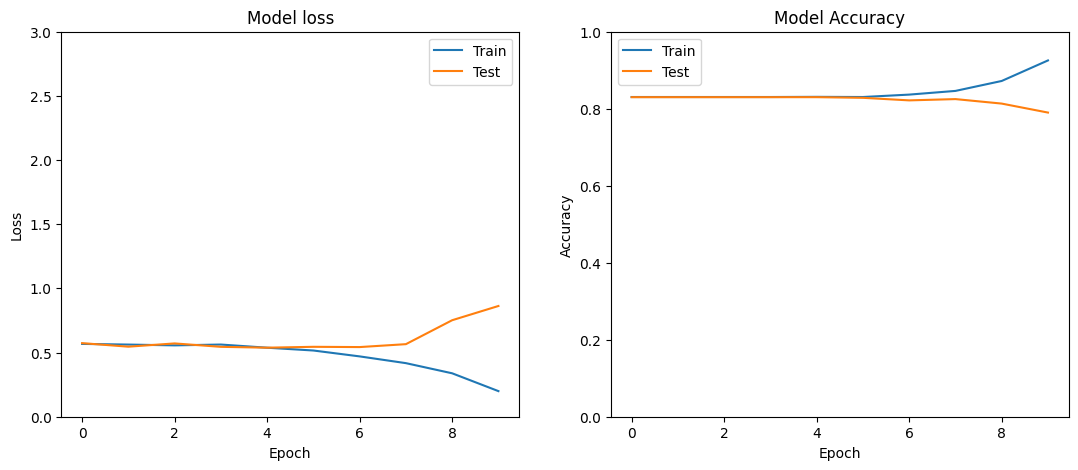

In [13]:
import matplotlib.pyplot as plt    
%matplotlib inline

# Metricas para evaluar el modelo

def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(13,5))
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    if title:
        fig.suptitle(title)

plot_loss_accuracy(history)